## Title
### Introduction:
    - provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
    - clearly state the question you tried to answer with your project
    - identify and fully describe the dataset that was used to answer the question
    
### Methods & Results:
    - describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    - your report should include code which:
    - loads data
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    - note: all figures should have a figure number and a legend
    
### Discussion:
    - summarize what you found
    - discuss whether this is what you expected to find?
    - discuss what impact could such findings have?
    - discuss what future questions could this lead to?
#### References
    - You may include references if necessary, as long as they all have a consistent citation style.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
set.seed(1)

url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
download.file(url1, destfile = "data/players.csv")
players <- read_csv("data/players.csv")
download.file(url2, destfile = "data/sessions.csv")
sessions <- read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
# Data Wrangling
# Sessions dataset
# Convert `start_time` and `end_time` to readable datetime
sessions_data <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time = dmy_hm(end_time, tz = "UTC"),
  )

# Players dataset
# Only use columns with values
players_data <- players |>
    select(experience:age)
sessions_data
players_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [5]:
# Combine both datasets
session_counts <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n())

# Join the session counts to players_data based on hashedEmail
set3 <- players_data |>
    left_join(session_counts, by = "hashedEmail")
set3

experience,subscribe,hashedEmail,played_hours,name,gender,age,count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1


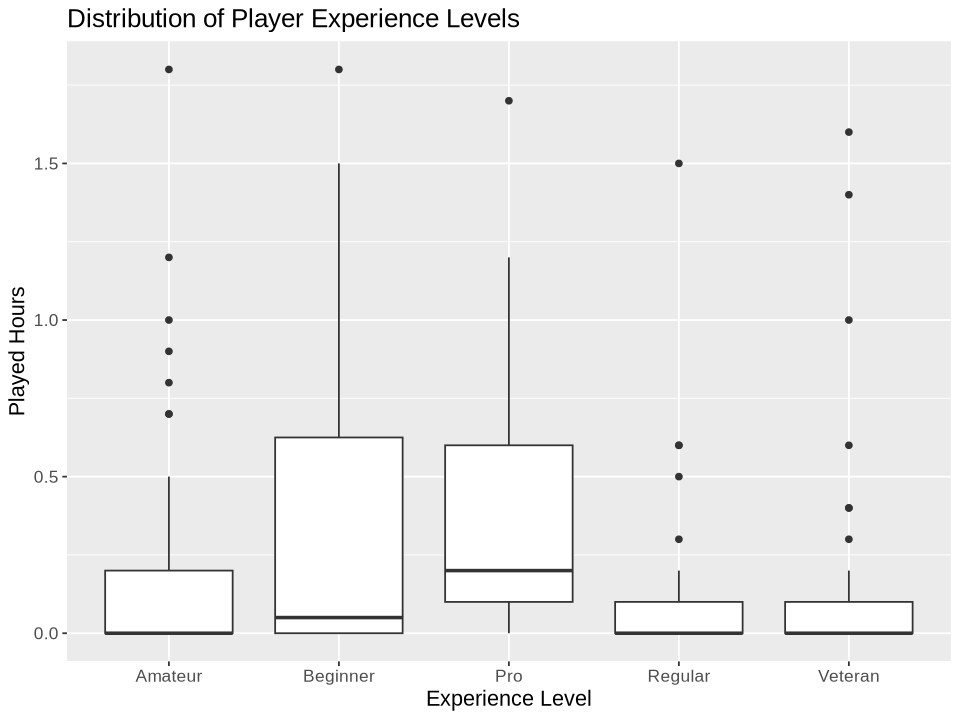

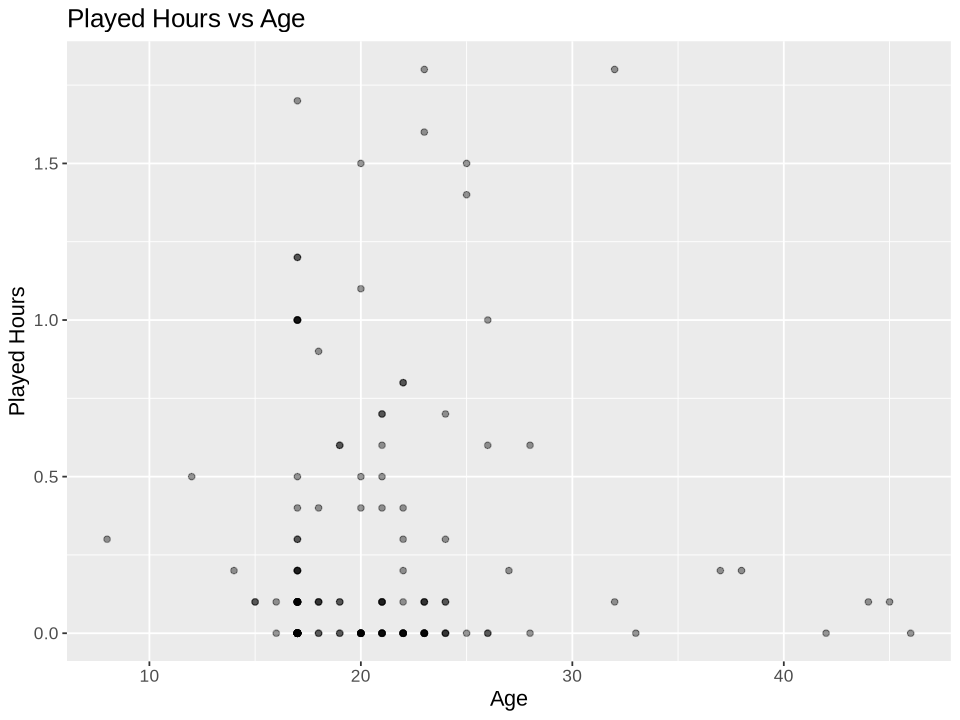

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)
# Played hours vs. Experience
# plot1 <- ggplot(set3, aes(x = experience)) +
#   geom_bar(fill = "lightgreen", color = "black") +
#   labs(
#     title = "Distribution of Player Experience Levels",
#     x = "Experience Level",
#     y = "Count of Players"
#   )

# plot2 <- ggplot(set3, aes(x = experience, y = played_hours)) +
#   geom_bar(stat = 'identity', position = "dodge") +
#   labs(
#     title = "Distribution of Player Experience Levels",
#     x = "Experience Level",
#     y = "Total Played hours"
#   )
set4 <- set3|>
    filter(played_hours < 2)
plot3 <- ggplot(set4, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Played Hours") +
theme(text = element_text(size = 13))
  

set5 <- set3|>
    filter(age < 50 & played_hours < 2) 
# Played hours vs. Age
plot4 <- ggplot(set5, aes(x = age, y = played_hours)) +
  geom_point(alpha=0.4) +
  labs(
    title = "Played Hours vs Age",
    x = "Age",
    y = "Played Hours") +
theme(text = element_text(size = 13))

plot3
plot4

In [32]:
#knn regression set up
library(caret)

training1_one_hot_encoding <- data.frame(experience = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))

dmy <- dummyVars("~ experience", data = training1_one_hot_encoding)

trsf <- data.frame(predict(dmy, newdata = training1_one_hot_encoding))

training1_combined <- cbind(training1_one_hot_encoding, trsf)

print(training1_combined)

df <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

encoded_factor <- set3 |>
    mutate(experience = as.factor(experience))

encoded_df <- encoded_factor |>
    tidyr::pivot_longer(
        cols = experience,
        names_to = "category",
        values_to = "value"
    ) |>
    group_by(category) |>
    mutate(value = factor(value, levels = unique(value))) |>
    ungroup()
    # select(value)

combinded_df <- encoded_df |>
    left_join(training1_combined, by = c("value" = "experience"))

combinded_df
# print(encoded_df)
# # 2. One-hot encoding using dummyVars
# training1_one_hot_encoding <- data.frame(experience = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))

# dmy <- dummyVars("~ experience", data = training1_one_hot_encoding)
# trsf <- data.frame(predict(dmy, newdata = training1_one_hot_encoding))

# # 3. Combine the original data with one-hot encoded columns
# training1_combined <- cbind(training1_one_hot_encoding, trsf)

# # Output the results
# print(training1_combined)

# knn_spec <- nearest_neighbour(weight_func = "rectangular", neighbours = tune()) |>
#    set_engine("kknn") |>
#    set_mode("regression")

# knn_recipe <- recipe(played_hours ~ age

  experience experienceAmateur experienceBeginner experiencePro
1   Beginner                 0                  1             0
2    Amateur                 1                  0             0
3    Regular                 0                  0             0
4    Veteran                 0                  0             0
5        Pro                 0                  0             1
  experienceRegular experienceVeteran
1                 0                 0
2                 0                 0
3                 1                 0
4                 0                 1
5                 0                 0


subscribe,hashedEmail,played_hours,name,gender,age,count,category,value,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,experience,Pro,0,0,1,0,0
TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,experience,Veteran,0,0,0,0,1
FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,experience,Veteran,0,0,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,experience,Amateur,1,0,0,0,0
FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,experience,Amateur,1,0,0,0,0
TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,experience,Pro,0,0,1,0,0


In [43]:
# Split data
set.seed(3)

split1 <- initial_split(combinded_df, prop = 0.70, strata = played_hours)
training1 <- training(split1)
testing1 <- testing(split1)


In [ ]:
# #linear regression!

# lin_spec <- linear_reg() |>
#     set_engine("lm") |>
#     set_mode("regression")

# lin_spec

# lin_recipe <- recipe(played_hours ~ age + experience, data = training1)

# lin_fit <- workflow() |>
#     add_recipe(lin_recipe) |>
#     add_model(lin_spec) |>
#     fit(data = training1)

# lin_training_test <- lin_fit |>
#     predict(training1) |>
#     bind_cols(training1)

# lin_training_test

# lin_training_predictions_age <- lin_training_test |>
#     ggplot(aes(x = age, y = played_hours)) +
#         geom_point() +
#         geom_line(
#             mapping = aes(x = age, y = .pred),
#             colour = "blue") +
#         xlab("Age (years)") +
#         ylab("Play Time (hours)") +
#         theme(text = element_text(size = 20))

# lin_training_predictions_age

In [50]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,22.24514,5,7.027532,Preprocessor1_Model05


In [51]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.20052,5,7.863206,Preprocessor1_Model01


In [54]:
set.seed(3)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(played_hours ~ age, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20.39174,5,7.899199,Preprocessor1_Model01
